In [1]:
import pretty_midi
import os
import pandas as pd
import numpy as np
from itertools import groupby
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt
pd.set_option("display.max_rows", 1000)

In [51]:
path1 = 'D:\\Academic_work\\00PerfTransfer\\Song\\midi_1\\standard\\'
path2 = 'D:\\Academic_work\\00PerfTransfer\\Song\\midi_1\\experiments\\'
stdmidi = pretty_midi.PrettyMIDI(os.path.join(path1 + '2-s.midi'))
submidi = pretty_midi.PrettyMIDI(os.path.join(path2 + '2-2-audi.midi'))

stdnotes = [{'std.start': n.start, 'std.end': n.end, 'std.pitch': n.pitch, 'std.velocity': n.velocity} for n in stdmidi.instruments[0].notes]
subnotes = [{'sub.start': n.start, 'sub.end': n.end, 'sub.pitch': n.pitch, 'sub.velocity': n.velocity} for n in submidi.instruments[0].notes]
stdnotes = sorted(stdnotes,key = lambda s: s['std.start']) 
subnotes = sorted(subnotes,key = lambda s: s['sub.start']) 

std_start = stdnotes[0]['std.start']
sub_start = subnotes[0]['sub.start']
stdnotes = [{'std.start': n['std.start']-std_start, 'std.end': n['std.end']-std_start, 'std.pitch': n['std.pitch'], 'std.velocity': n['std.velocity']} for n in stdnotes]
subnotes = [{'sub.start': n['sub.start']-sub_start, 'sub.end': n['sub.end']-sub_start, 'sub.pitch': n['sub.pitch'], 'sub.velocity': n['sub.velocity']} for n in subnotes]
# std_df = pd.DataFrame(stdnotes)
# sub_df = pd.DataFrame(subnotes)
# std_df = std_df[['std.pitch', 'std.start', 'std.end', 'std.velocity']]
# sub_df = sub_df[['sub.pitch', 'sub.start', 'sub.end', 'sub.velocity']]

In [52]:
maxi = max(len(stdnotes),len(subnotes))
mini = min(len(stdnotes),len(subnotes))
print('std=', len(stdnotes), 'sub=', len(subnotes))

std= 97 sub= 97


In [50]:
if len(stdnotes) >= len(subnotes):
    dyn_n = subnotes
    std_n = stdnotes
    dynPname = 'sub.pitch'
    stdPname = 'std.pitch'
    dynSname = 'sub.start'
    stdSname = 'std.start'
    dynEname = 'sub.end'
    stdEname = 'std.end'
    dynVname = 'sub.velocity'
    stdVname = 'std.velocity'
    for i in range(mini,maxi):
        dyn_n.append({'sub.start': 0, 'sub.end': 0, 'sub.pitch': 0, 'sub.velocity': 0})
elif len(stdnotes) < len(subnotes):
    dyn_n = subnotes
    std_n = subnotes
    dynPname = 'std.pitch'
    stdPname = 'sub.pitch'
    dynSname = 'std.start'
    stdSname = 'sub.start'
    dynEname = 'std.end'
    stdEname = 'sub.end'
    dynVname = 'std.velocity'
    stdVname = 'sub.velocity'
    for i in range(mini,maxi):
        dyn_n.append({'std.start': 0, 'std.end': 0, 'std.pitch': 0, 'std.velocity': 0})

In [5]:
indexF = []
match_list = []
for i in range(maxi):
    if dyn_n[i][dynPname] != std_n[i][stdPname]:
        indexF.append(i)
        dyn_n[i]['match'] = False
        std_n[i]['match'] = False
    else:
        match_list.append((i, i))
        std_n[i]['match'] = True
        dyn_n[i]['match'] = True

In [6]:
len(indexF)

148

In [7]:
error = [0.02, 0.05, 0.1, 0.3, 0.5, 0.8]

In [8]:
dyn_n

[{'sub.start': 0.0,
  'sub.end': 1.1374999999999997,
  'sub.pitch': 74,
  'sub.velocity': 52,
  'match': True},
 {'sub.start': 0.010416666666666519,
  'sub.end': 0.2770833333333331,
  'sub.pitch': 46,
  'sub.velocity': 23,
  'match': True},
 {'sub.start': 0.6197916666666665,
  'sub.end': 0.7166666666666663,
  'sub.pitch': 58,
  'sub.velocity': 33,
  'match': True},
 {'sub.start': 0.6197916666666665,
  'sub.end': 0.7385416666666664,
  'sub.pitch': 62,
  'sub.velocity': 24,
  'match': True},
 {'sub.start': 1.0395833333333333,
  'sub.end': 2.4,
  'sub.pitch': 53,
  'sub.velocity': 42,
  'match': False},
 {'sub.start': 1.0604166666666663,
  'sub.end': 1.2312499999999997,
  'sub.pitch': 62,
  'sub.velocity': 34,
  'match': False},
 {'sub.start': 1.071875,
  'sub.end': 1.2312499999999997,
  'sub.pitch': 58,
  'sub.velocity': 37,
  'match': True},
 {'sub.start': 1.4666666666666663,
  'sub.end': 1.6177083333333333,
  'sub.pitch': 58,
  'sub.velocity': 30,
  'match': False},
 {'sub.start': 1.46

In [9]:
std_n

[{'std.start': 0.0,
  'std.end': 1.130208333333333,
  'std.pitch': 74,
  'std.velocity': 50,
  'match': True},
 {'std.start': 0.020833333333333037,
  'std.end': 0.18229166666666652,
  'std.pitch': 46,
  'std.velocity': 25,
  'match': True},
 {'std.start': 0.6218749999999997,
  'std.end': 0.7489583333333334,
  'std.pitch': 58,
  'std.velocity': 39,
  'match': True},
 {'std.start': 0.6218749999999997,
  'std.end': 0.7489583333333334,
  'std.pitch': 62,
  'std.velocity': 24,
  'match': True},
 {'std.start': 1.0666666666666664,
  'std.end': 1.1635416666666667,
  'std.pitch': 62,
  'std.velocity': 25,
  'match': False},
 {'std.start': 1.0770833333333334,
  'std.end': 2.434375,
  'std.pitch': 53,
  'std.velocity': 42,
  'match': False},
 {'std.start': 1.0875,
  'std.end': 1.1635416666666667,
  'std.pitch': 58,
  'std.velocity': 28,
  'match': True},
 {'std.start': 1.4822916666666663,
  'std.end': 2.1239583333333334,
  'std.pitch': 79,
  'std.velocity': 69,
  'match': False},
 {'std.start': 1

In [10]:
for err in error:
    for idx in indexF:
        match = dyn_n[idx]['match']
        lowerb = std_n[idx][stdSname] - err
        upperb = std_n[idx][stdSname] + err
        
        dyn_p = dyn_n[idx][dynPname]
        
        t = idx + 1
        s = std_n[idx][stdSname]
        while s <= upperb and match == False:
            if t >= maxi:
                break
                
            s = std_n[t][stdSname] 
            if std_n[t][stdPname] == dyn_p and std_n[t]['match'] == False:
                dyn_n[idx]['match'] = True
                std_n[t]['match'] = True
                match = True
                match_list.append((t, idx))
                print(match)
                print(t)
            t += 1
        
        t = idx - 1
        s = std_n[t][stdSname]
        while s >= lowerb and match == False:
            if t < 0:
                break
                
            s = std_n[t][stdSname]    
            if std_n[t][stdPname] == dyn_p and std_n[t]['match'] == False:
                dyn_n[idx]['match'] = True
                std_n[t]['match'] = True
                match = True
                match_list.append((t, idx))
                print(match)
                print(t)
            t -= 1

True
5
True
4
True
8
True
7
True
21
True
23
True
24
True
22
True
25
True
26
True
28
True
29
True
31
True
42
True
44
True
46
True
50
True
51
True
54
True
55
True
52
True
58
True
61
True
64
True
75
True
81
True
82
True
84
True
88
True
86
True
130
True
142
True
143
True
140
True
152
True
148
True
154
True
155
True
156
True
153
True
158
True
164
True
32
True
36
True
48
True
79
True
111
True
39
True
71
True
100
True
103
True
133
True
134
True
19
True
35
True
40
True
72
True
68
True
93
True
99
True
101
True
102
True
108
True
109
True
110
True
114
True
119
True
118
True
120
True
125
True
126
True
127
True
138
True
141
True
20
True
30
True
34
True
38
True
45
True
49
True
53
True
59
True
66
True
65
True
69
True
70
True
74
True
73
True
77
True
78
True
85
True
87
True
89
True
92
True
94
True
95
True
97
True
98
True
104
True
107
True
112
True
116
True
121
True
124
True
128
True
132
True
135
True
144
True
139
True
149
True
151
True
157
True
43
True
62
True
80
True
83
True
96
True
105
True
106
True


In [11]:
k = 0
for n in dyn_n:
    if n['match'] == True:
        k += 1
k

146

In [12]:
match_list

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (6, 6),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (18, 18),
 (37, 37),
 (47, 47),
 (57, 57),
 (63, 63),
 (147, 147),
 (5, 4),
 (4, 5),
 (8, 7),
 (7, 8),
 (21, 20),
 (23, 21),
 (24, 22),
 (22, 23),
 (25, 24),
 (26, 25),
 (28, 26),
 (29, 28),
 (31, 29),
 (42, 40),
 (44, 42),
 (46, 45),
 (50, 48),
 (51, 49),
 (54, 51),
 (55, 53),
 (52, 54),
 (58, 56),
 (61, 60),
 (64, 65),
 (75, 74),
 (81, 80),
 (82, 81),
 (84, 83),
 (88, 86),
 (86, 87),
 (130, 132),
 (142, 138),
 (143, 139),
 (140, 141),
 (152, 148),
 (148, 151),
 (154, 153),
 (155, 154),
 (156, 155),
 (153, 156),
 (158, 157),
 (164, 161),
 (32, 30),
 (36, 33),
 (48, 44),
 (79, 75),
 (111, 107),
 (39, 36),
 (71, 67),
 (100, 97),
 (103, 99),
 (133, 129),
 (134, 130),
 (19, 17),
 (35, 32),
 (40, 38),
 (72, 68),
 (68, 71),
 (93, 89),
 (99, 95),
 (101, 96),
 (102, 98),
 (108, 104),
 (109, 105),
 (110, 106),
 (114, 112),
 (119, 113),
 (118, 114),
 (120, 115),
 (125, 121),


In [13]:
match_list2 = sorted(match_list,key = lambda s: s[0])
match_list2

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 5),
 (5, 4),
 (6, 6),
 (7, 8),
 (8, 7),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (18, 18),
 (19, 17),
 (20, 16),
 (21, 20),
 (22, 23),
 (23, 21),
 (24, 22),
 (25, 24),
 (26, 25),
 (28, 26),
 (29, 28),
 (30, 27),
 (31, 29),
 (32, 30),
 (34, 31),
 (35, 32),
 (36, 33),
 (37, 37),
 (38, 34),
 (39, 36),
 (40, 38),
 (42, 40),
 (43, 41),
 (44, 42),
 (45, 43),
 (46, 45),
 (47, 47),
 (48, 44),
 (49, 46),
 (50, 48),
 (51, 49),
 (52, 54),
 (53, 50),
 (54, 51),
 (55, 53),
 (57, 57),
 (58, 56),
 (59, 55),
 (61, 60),
 (62, 59),
 (63, 63),
 (64, 65),
 (65, 62),
 (66, 61),
 (68, 71),
 (69, 64),
 (70, 66),
 (71, 67),
 (72, 68),
 (73, 70),
 (74, 69),
 (75, 74),
 (77, 72),
 (78, 73),
 (79, 75),
 (80, 76),
 (81, 80),
 (82, 81),
 (83, 79),
 (84, 83),
 (85, 82),
 (86, 87),
 (87, 84),
 (88, 86),
 (89, 85),
 (92, 88),
 (93, 89),
 (94, 90),
 (95, 91),
 (96, 92),
 (97, 93),
 (98, 94),
 (99, 95),
 (100, 97),
 (101, 96),
 (102, 98),
 (103

In [22]:
l_dyn = [dyn_n[t[1]] for t in match_list2]

In [23]:
l_std = [std_n[t[0]] for t in match_list2]

In [31]:
ll = [t[0] for t in match_list2]
for i in range(maxi):
    if i not in ll:
        match_list2.insert(i, (i, 'None'))
match_list2

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 5),
 (5, 4),
 (6, 6),
 (7, 8),
 (8, 7),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 'None'),
 (17, 'None'),
 (18, 18),
 (19, 17),
 (20, 16),
 (21, 20),
 (22, 23),
 (23, 21),
 (24, 22),
 (25, 24),
 (26, 25),
 (27, 'None'),
 (28, 26),
 (29, 28),
 (30, 27),
 (31, 29),
 (32, 30),
 (33, 'None'),
 (34, 31),
 (35, 32),
 (36, 33),
 (37, 37),
 (38, 34),
 (39, 36),
 (40, 38),
 (41, 'None'),
 (42, 40),
 (43, 41),
 (44, 42),
 (45, 43),
 (46, 45),
 (47, 47),
 (48, 44),
 (49, 46),
 (50, 48),
 (51, 49),
 (52, 54),
 (53, 50),
 (54, 51),
 (55, 53),
 (56, 'None'),
 (57, 57),
 (58, 56),
 (59, 55),
 (60, 'None'),
 (61, 60),
 (62, 59),
 (63, 63),
 (64, 65),
 (65, 62),
 (66, 61),
 (67, 'None'),
 (68, 71),
 (69, 64),
 (70, 66),
 (71, 67),
 (72, 68),
 (73, 70),
 (74, 69),
 (75, 74),
 (76, 'None'),
 (77, 72),
 (78, 73),
 (79, 75),
 (80, 76),
 (81, 80),
 (82, 81),
 (83, 79),
 (84, 83),
 (85, 82),
 (86, 87),
 (87, 84),
 (88, 86),
 (89,

In [38]:
new_notes = []
for item in match_list2:
    dit = std_n[item[0]]
    if item[1] == 'None':
        dit[dynEname] = 0
        dit[dynPname] = 0
        dit[dynSname] = 0
        dit[dynVname] = 0
    else:
        dit[dynEname] = dyn_n[item[1]][dynEname]
        dit[dynPname] = dyn_n[item[1]][dynPname]
        dit[dynSname] = dyn_n[item[1]][dynSname]
        dit[dynVname] = dyn_n[item[1]][dynVname]
    new_notes.append(dit)
new_notes = sorted(new_notes,key = lambda s: s[stdSname])

In [39]:
new_notes

[{'std.start': 0.0,
  'std.end': 1.130208333333333,
  'std.pitch': 74,
  'std.velocity': 50,
  'match': True,
  'sub.end': 1.1374999999999997,
  'sub.pitch': 74,
  'sub.start': 0.0,
  'sub.velocity': 52},
 {'std.start': 0.020833333333333037,
  'std.end': 0.18229166666666652,
  'std.pitch': 46,
  'std.velocity': 25,
  'match': True,
  'sub.end': 0.2770833333333331,
  'sub.pitch': 46,
  'sub.start': 0.010416666666666519,
  'sub.velocity': 23},
 {'std.start': 0.6218749999999997,
  'std.end': 0.7489583333333334,
  'std.pitch': 58,
  'std.velocity': 39,
  'match': True,
  'sub.end': 0.7166666666666663,
  'sub.pitch': 58,
  'sub.start': 0.6197916666666665,
  'sub.velocity': 33},
 {'std.start': 0.6218749999999997,
  'std.end': 0.7489583333333334,
  'std.pitch': 62,
  'std.velocity': 24,
  'match': True,
  'sub.end': 0.7385416666666664,
  'sub.pitch': 62,
  'sub.start': 0.6197916666666665,
  'sub.velocity': 24},
 {'std.start': 1.0666666666666664,
  'std.end': 1.1635416666666667,
  'std.pitch':

In [44]:
df = pd.DataFrame(new_notes)
df = df[['std.pitch', 'std.start', 'std.end', 'std.velocity', 'sub.pitch', 'sub.start', 'sub.end', 'sub.velocity', 'match']]
df

,std.pitch,std.start,std.end,std.velocity,sub.pitch,sub.start,sub.end,sub.velocity,match
0,74,0.000000,1.130208,50,74,0.000000,1.137500,52,True
1,46,0.020833,0.182292,25,46,0.010417,0.277083,23,True
2,58,0.621875,0.748958,39,58,0.619792,0.716667,33,True
3,62,0.621875,0.748958,24,62,0.619792,0.738542,24,True
4,62,1.066667,1.163542,25,62,1.060417,1.231250,34,True
5,53,1.077083,2.434375,42,53,1.039583,2.400000,42,True
6,58,1.087500,1.163542,28,58,1.071875,1.231250,37,True
7,79,1.482292,2.123958,69,79,1.466667,2.109375,70,True
8,58,1.492708,1.619792,47,58,1.466667,1.617708,30,True
9,62,1.492708,1.631250,32,62,1.477083,1.607292,26,True


In [34]:
std_n

[{'std.start': 0.0,
  'std.end': 1.130208333333333,
  'std.pitch': 74,
  'std.velocity': 50,
  'match': True},
 {'std.start': 0.020833333333333037,
  'std.end': 0.18229166666666652,
  'std.pitch': 46,
  'std.velocity': 25,
  'match': True},
 {'std.start': 0.6218749999999997,
  'std.end': 0.7489583333333334,
  'std.pitch': 58,
  'std.velocity': 39,
  'match': True},
 {'std.start': 0.6218749999999997,
  'std.end': 0.7489583333333334,
  'std.pitch': 62,
  'std.velocity': 24,
  'match': True},
 {'std.start': 1.0666666666666664,
  'std.end': 1.1635416666666667,
  'std.pitch': 62,
  'std.velocity': 25,
  'match': True},
 {'std.start': 1.0770833333333334,
  'std.end': 2.434375,
  'std.pitch': 53,
  'std.velocity': 42,
  'match': True},
 {'std.start': 1.0875,
  'std.end': 1.1635416666666667,
  'std.pitch': 58,
  'std.velocity': 28,
  'match': True},
 {'std.start': 1.4822916666666663,
  'std.end': 2.1239583333333334,
  'std.pitch': 79,
  'std.velocity': 69,
  'match': True},
 {'std.start': 1.49

In [24]:
std_df = pd.DataFrame(l_std)
sub_df = pd.DataFrame(l_dyn)
std_df = std_df[['std.pitch', 'std.start', 'std.end', 'std.velocity', 'match']]
sub_df = sub_df[['sub.pitch', 'sub.start', 'sub.end', 'sub.velocity', 'match']]
df = pd.concat([std_df, sub_df], axis=1)
# df['new_col'] = sta_df[staPname] == dyn_df[dynPname]
df

,std.pitch,std.start,std.end,std.velocity,match,sub.pitch,sub.start,sub.end,sub.velocity,match
0,74,0.000000,1.130208,50,True,74,0.000000,1.137500,52,True
1,46,0.020833,0.182292,25,True,46,0.010417,0.277083,23,True
2,58,0.621875,0.748958,39,True,58,0.619792,0.716667,33,True
3,62,0.621875,0.748958,24,True,62,0.619792,0.738542,24,True
4,62,1.066667,1.163542,25,True,62,1.060417,1.231250,34,True
5,53,1.077083,2.434375,42,True,53,1.039583,2.400000,42,True
6,58,1.087500,1.163542,28,True,58,1.071875,1.231250,37,True
7,79,1.482292,2.123958,69,True,79,1.466667,2.109375,70,True
8,58,1.492708,1.619792,47,True,58,1.466667,1.617708,30,True
9,62,1.492708,1.631250,32,True,62,1.477083,1.607292,26,True


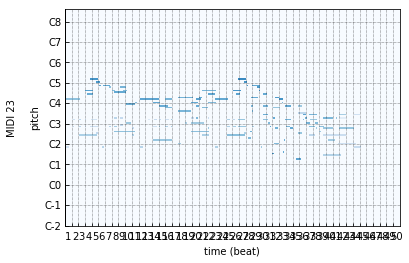

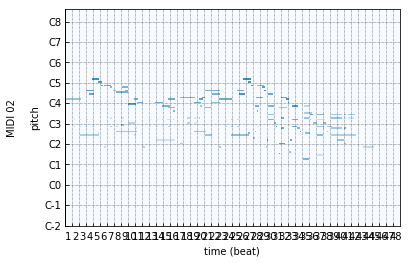

In [47]:
new_out = df.iloc[:,4:8]

new_notes1 = []  
for row in new_out.iterrows():
    new_notes1.append(pretty_midi.Note(
        velocity=int(row[1][3]), pitch=int(row[1][0]), start=row[1][1], end=row[1][2]))
submidi.instruments[0].notes = new_notes1

new_notes2 = []
for row in std_df.iterrows():
    new_notes2.append(pretty_midi.Note(
        velocity=int(row[1][3]), pitch=int(row[1][0]), start=row[1][1], end=row[1][2]))
stdmidi.instruments[0].notes = new_notes2

submidi.write('newsubmidi.midi')
stdmidi.write('newstdmidi.midi')

loaded1 = Multitrack('newsubmidi.midi')
loaded2 = Multitrack('newstdmidi.midi')
fig1, axs1 = loaded1.plot()
fig2, axs2 = loaded2.plot()
plt.show()

In [ ]:
fun = lambda x: x[1]-x[0]

lit1 = []
lit2 = []
cur = 0
for k, g in groupby(enumerate(indexF), fun):
    l1 = [j for i, j in g]
    lit1.append(list(range(cur,l1[0])))
    lit1.append(l1)
    lit2.append(l1)
    cur = l1[-1]+1
lit1.append(list(range(lit1[-1][-1]+1, maxi)))

In [ ]:
for i in range(len(lit1)):
    if lit1[i] in lit2:
        if len(lit1[i]) == 1:
            pass
        else:
            dfff = dyn_df.iloc[lit1[i]]
            new_idx = lit1[i]
            for e in range(len(lit1[i])):
                nl = dfff[dfff[dynPname] == sta_df.iloc[lit1[i][e],0]].index.tolist()
                if nl:
                    new_idx[e] = nl[0]
            if new_idx:
                lit1[i] = new_idx
lit = [x for i in lit1 for x in i]
dyn_df = dyn_df.iloc[lit]
dyn_df.index = range(len(dyn_df))

In [ ]:
lit2

In [ ]:
std_df = sta_df
sub_df = dyn_df

In [ ]:
df = pd.concat([sta_df, dyn_df], axis=1)
df['new_col'] = sta_df[staPname] == dyn_df[dynPname]
df

In [46]:
new_out = df.iloc[:,4:]
new_index = list(new_out[new_out['new_col'] == True].index)
new_out = new_out.iloc[new_index,:4]

new_notes1 = []  
for row in new_out.iterrows():
    new_notes1.append(pretty_midi.Note(
        velocity=100, pitch=int(row[1][0]), start=row[1][1], end=row[1][1]+0.5))
submidi.instruments[0].notes = new_notes1

new_notes2 = []
for row in std_df.iterrows():
    new_notes2.append(pretty_midi.Note(
        velocity=100, pitch=int(row[1][0]), start=row[1][1], end=row[1][1]+0.5))
stdmidi.instruments[0].notes = new_notes2

submidi.write('newsubmidi.midi')
stdmidi.write('newstdmidi.midi')

loaded1 = Multitrack('newsubmidi.midi')
loaded2 = Multitrack('newstdmidi.midi')
fig1, axs1 = loaded1.plot()
fig2, axs2 = loaded2.plot()
plt.show()

KeyError: 'new_col'

In [ ]:
print('notes1:',len(new_notes1),'notes2:', len(new_notes2))